In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [44]:
dataset_path = r"C:\Users\rutvi\Desktop\pedigree_inheritance_predictor\data"

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 59 images belonging to 7 classes.
Found 13 images belonging to 7 classes.


In [46]:
from tensorflow.keras import Input, layers, models

model = models.Sequential([
    Input(shape=(128,128,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # ✅ 7 classes
])

In [47]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3849 - loss: 1.6419 - val_accuracy: 0.3846 - val_loss: 1.4944
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 893ms/step - accuracy: 0.3189 - loss: 1.6765 - val_accuracy: 0.3846 - val_loss: 1.4454
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3833 - loss: 1.6325 - val_accuracy: 0.3846 - val_loss: 1.4582
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4080 - loss: 1.6028 - val_accuracy: 0.3846 - val_loss: 1.4335
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 780ms/step - accuracy: 0.3623 - loss: 1.5798 - val_accuracy: 0.3846 - val_loss: 1.4041
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 787ms/step - accuracy: 0.3840 - loss: 1.6117 - val_accuracy: 0.3846 - val_loss: 1.4375
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 882ms/step - accuracy: 0.3397 - loss: 1.6108 - val_accuracy: 0.3846 - val_loss: 1.4505
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 781ms/step - accuracy: 0.3258 - loss: 1.6464 - val_accuracy: 0.3846 - val_loss: 1.4862
E

In [49]:
loss, accuracy = model.evaluate(validation_generator)
print(f"\n✅ Validation Accuracy: {accuracy*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.3846 - loss: 1.4921

✅ Validation Accuracy: 38.46%


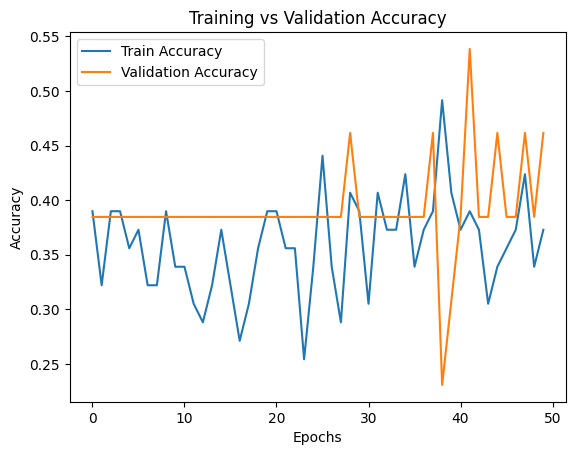

In [57]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
model.save("pedigree_inheritance_cnn_model.h5")
print("\n💾 Model saved as 'pedigree_inheritance_cnn_model.h5'")



💾 Model saved as 'pedigree_inheritance_cnn_model.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


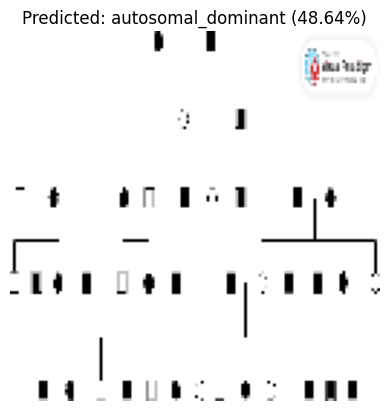


🧬 Predicted Inheritance Type: autosomal_dominant
🔢 Confidence: 48.64%


In [59]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 🔹 Function to predict inheritance type from an image and display it
def predict_pedigree(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)
    
    # Predict class probabilities
    prediction = model.predict(img_array_expanded)
    
    # Map predicted class index to label
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    
    # Display image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.show()
    
    print(f"\n🧬 Predicted Inheritance Type: {predicted_class}")
    print(f"🔢 Confidence: {confidence:.2f}%")

# Example
test_image_path = r"C:\Users\rutvi\Desktop\pedigree_inheritance_predictor\data\autosomal_dominant\dominant_4.png"
predict_pedigree(test_image_path)
